## Import Libraries

In [1]:
import os
import pokereval
import scipy.misc
#IPython Command
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#We have called a function
pe = pokereval.PokerEval()

In [3]:
pokereval.PokerEval?

## Define Constants

In [4]:
##Useful constants
numCards = 52
numRanks = 13
numSuits = 4
numHands = 1326
numVillainHand = 1255
##Useful lists
suits = ["h", 'd', 'c', 's']
ranks = ["A","K","Q","J","T","9","8","7","6","5","4","3","2"]
cards = []
for i in suits:
    for j in reversed(ranks):
        cards.append(j + i)

print(cards)

['2h', '3h', '4h', '5h', '6h', '7h', '8h', '9h', 'Th', 'Jh', 'Qh', 'Kh', 'Ah', '2d', '3d', '4d', '5d', '6d', '7d', '8d', '9d', 'Td', 'Jd', 'Qd', 'Kd', 'Ad', '2c', '3c', '4c', '5c', '6c', '7c', '8c', '9c', 'Tc', 'Jc', 'Qc', 'Kc', 'Ac', '2s', '3s', '4s', '5s', '6s', '7s', '8s', '9s', 'Ts', 'Js', 'Qs', 'Ks', 'As']


In [5]:
handAsStrings = ["Ah", "Jd"]
boardAsStrings = ["8d","6s","3h","Kd",'__']

### Demonstrating Conversion from string format to numerical format for cards

In [6]:
#Testing conversion from hand codes to numbers
# "__" represents an unknown card
pe.string2card(handAsStrings)

[12, 22]

In [7]:
#Always work with the numerical convention of cards
#Convert back at the last second
hand = pe.string2card(handAsStrings)
board = pe.string2card(boardAsStrings)

### Test for conflicts between two lists of cards

In [8]:
##Checks if there are any commonalitites between the lists
def conflicts(cards1, cards2):
    s = set()
    for i in cards1:
        s.add(i)
    for i in cards2:
        if i in s:
            return True
    return False
    

In [9]:
##Testing the conflicts function
conflicts(hand, board)
conflicts(pe.string2card(["Ah","3h"]),board)

True

## Hand vs Hand Equity Calculations
Before we are able to calculate hand vs range calcs we have to do hand vs hand

In [10]:
villainhand = pe.string2card(["As","4s"])
peresult = pe.poker_eval(game = 'holdem', pockets = [hand,villainhand], board = board)

## Winhi (How many hands first wins)

In [11]:
peresult["eval"][0]["winhi"]

41

In [12]:
#Compute equity
def getEquityVsHand(hand, villainHand, board):
    if conflicts(hand,villainHand) or conflicts(hand,board) or conflicts(villainHand,board):
        return -1
    else:
        res = pe.poker_eval(game = 'holdem', pockets = [hand,villainHand], board = board)
        total = res["info"][0]
        wins = res["eval"][0]["winhi"]
        ties = res["eval"][0]['tiehi']
        return (float(wins) + ties/2.0)/float(total)

In [13]:
hand1 = pe.string2card(["Ah","jd"])
hand2 = pe.string2card(["4c","3s"])

In [14]:
getEquityVsHand(hand1,hand2,board)

0.13636363636363635

### Equity Array
* We will create a lookup table of all hand vs hand equity matchups

In [15]:
numpy.zeros((numHands,numHands))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
for i in range(numCards):
    for j in range(numCards):
        if i != j:
            print([cards[i],cards[j]])

['2h', '3h']
['2h', '4h']
['2h', '5h']
['2h', '6h']
['2h', '7h']
['2h', '8h']
['2h', '9h']
['2h', 'Th']
['2h', 'Jh']
['2h', 'Qh']
['2h', 'Kh']
['2h', 'Ah']
['2h', '2d']
['2h', '3d']
['2h', '4d']
['2h', '5d']
['2h', '6d']
['2h', '7d']
['2h', '8d']
['2h', '9d']
['2h', 'Td']
['2h', 'Jd']
['2h', 'Qd']
['2h', 'Kd']
['2h', 'Ad']
['2h', '2c']
['2h', '3c']
['2h', '4c']
['2h', '5c']
['2h', '6c']
['2h', '7c']
['2h', '8c']
['2h', '9c']
['2h', 'Tc']
['2h', 'Jc']
['2h', 'Qc']
['2h', 'Kc']
['2h', 'Ac']
['2h', '2s']
['2h', '3s']
['2h', '4s']
['2h', '5s']
['2h', '6s']
['2h', '7s']
['2h', '8s']
['2h', '9s']
['2h', 'Ts']
['2h', 'Js']
['2h', 'Qs']
['2h', 'Ks']
['2h', 'As']
['3h', '2h']
['3h', '4h']
['3h', '5h']
['3h', '6h']
['3h', '7h']
['3h', '8h']
['3h', '9h']
['3h', 'Th']
['3h', 'Jh']
['3h', 'Qh']
['3h', 'Kh']
['3h', 'Ah']
['3h', '2d']
['3h', '3d']
['3h', '4d']
['3h', '5d']
['3h', '6d']
['3h', '7d']
['3h', '8d']
['3h', '9d']
['3h', 'Td']
['3h', 'Jd']
['3h', 'Qd']
['3h', 'Kd']
['3h', 'Ad']
['3h', '2c']

['7d', 'Th']
['7d', 'Jh']
['7d', 'Qh']
['7d', 'Kh']
['7d', 'Ah']
['7d', '2d']
['7d', '3d']
['7d', '4d']
['7d', '5d']
['7d', '6d']
['7d', '8d']
['7d', '9d']
['7d', 'Td']
['7d', 'Jd']
['7d', 'Qd']
['7d', 'Kd']
['7d', 'Ad']
['7d', '2c']
['7d', '3c']
['7d', '4c']
['7d', '5c']
['7d', '6c']
['7d', '7c']
['7d', '8c']
['7d', '9c']
['7d', 'Tc']
['7d', 'Jc']
['7d', 'Qc']
['7d', 'Kc']
['7d', 'Ac']
['7d', '2s']
['7d', '3s']
['7d', '4s']
['7d', '5s']
['7d', '6s']
['7d', '7s']
['7d', '8s']
['7d', '9s']
['7d', 'Ts']
['7d', 'Js']
['7d', 'Qs']
['7d', 'Ks']
['7d', 'As']
['8d', '2h']
['8d', '3h']
['8d', '4h']
['8d', '5h']
['8d', '6h']
['8d', '7h']
['8d', '8h']
['8d', '9h']
['8d', 'Th']
['8d', 'Jh']
['8d', 'Qh']
['8d', 'Kh']
['8d', 'Ah']
['8d', '2d']
['8d', '3d']
['8d', '4d']
['8d', '5d']
['8d', '6d']
['8d', '7d']
['8d', '9d']
['8d', 'Td']
['8d', 'Jd']
['8d', 'Qd']
['8d', 'Kd']
['8d', 'Ad']
['8d', '2c']
['8d', '3c']
['8d', '4c']
['8d', '5c']
['8d', '6c']
['8d', '7c']
['8d', '8c']
['8d', '9c']
['8d', 'Tc']

['5s', '8h']
['5s', '9h']
['5s', 'Th']
['5s', 'Jh']
['5s', 'Qh']
['5s', 'Kh']
['5s', 'Ah']
['5s', '2d']
['5s', '3d']
['5s', '4d']
['5s', '5d']
['5s', '6d']
['5s', '7d']
['5s', '8d']
['5s', '9d']
['5s', 'Td']
['5s', 'Jd']
['5s', 'Qd']
['5s', 'Kd']
['5s', 'Ad']
['5s', '2c']
['5s', '3c']
['5s', '4c']
['5s', '5c']
['5s', '6c']
['5s', '7c']
['5s', '8c']
['5s', '9c']
['5s', 'Tc']
['5s', 'Jc']
['5s', 'Qc']
['5s', 'Kc']
['5s', 'Ac']
['5s', '2s']
['5s', '3s']
['5s', '4s']
['5s', '6s']
['5s', '7s']
['5s', '8s']
['5s', '9s']
['5s', 'Ts']
['5s', 'Js']
['5s', 'Qs']
['5s', 'Ks']
['5s', 'As']
['6s', '2h']
['6s', '3h']
['6s', '4h']
['6s', '5h']
['6s', '6h']
['6s', '7h']
['6s', '8h']
['6s', '9h']
['6s', 'Th']
['6s', 'Jh']
['6s', 'Qh']
['6s', 'Kh']
['6s', 'Ah']
['6s', '2d']
['6s', '3d']
['6s', '4d']
['6s', '5d']
['6s', '6d']
['6s', '7d']
['6s', '8d']
['6s', '9d']
['6s', 'Td']
['6s', 'Jd']
['6s', 'Qd']
['6s', 'Kd']
['6s', 'Ad']
['6s', '2c']
['6s', '3c']
['6s', '4c']
['6s', '5c']
['6s', '6c']
['6s', '7c']

In [17]:
#Generates all hand vs hand equity for particular board
class EquityArray:
    #Constructor
    #Input
    #B - list of numbers representing a board
    def __init__(self, b):
        self.board = b
        self.eArray = numpy.zeros((numCards, numCards,numCards,numCards))
        if os.path.isfile(self.getFilename()):
            self.eArray = numpy.load(self.getFilename())
        else:
            self.makeArray()
    
    def makeArray(self):
        for i in range(numCards):
            for j in range(numCards):
                for a in range(numCards):
                    for b in range(numCards):
                        hand = [i,j]
                        villainHand = [a,b]
                        #Works since we can convert back and forth between numbers and cards
                        self.eArray[i][j][a][b] = getEquityVsHand(hand,villainHand,self.board)
        numpy.save(self.getFilename(),self.eArray)
                        
    
    def getFilename(self):
        boardStr = ""
        boardAsStrings = pe.card2string(self.board)
        for i in boardAsStrings:
            if i != '__':
                boardStr = boardStr + i
        if boardStr == '':
            boardStr = 'preflop'
        boardStr = boardStr + '.ea.npy'
        return boardStr
        

In [18]:
pe.card2string(board)

['8d', '6s', '3h', 'Kd', '__']

In [19]:
myEArray = EquityArray(board)

In [20]:
myEArray.getFilename()

'8d6s3hKd.ea.npy'

In [21]:
print(myEArray.eArray)

[[[[-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.          0.5        ...  0.86666667  0.06666667
     0.86666667]
   ...
   [-1.         -1.          0.86666667 ...  0.16304348  0.06666667
     0.86666667]
   [-1.         -1.          0.06666667 ...  0.06666667  0.
     0.06666667]
   [-1.         -1.          0.86666667 ...  0.86666667  0.06666667
     0.06521739]]

  [[-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   ...
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]]

  [[-1.         -1.         -1.   

In [22]:
def getEquityVsHandFast(hand, villainHand, ea):
    return ea.eArray[hand[0],hand[1],villainHand[0],villainHand[1]]

In [23]:
getEquityVsHandFast(hand,villainhand,myEArray)

0.9318181818181818

# My Class

In [24]:
#Describes a poker hand
class Range:
    def __init__(self):
            self.holdings = numpy.zeros(numCards,numCards)
    
    def getNumHands():
        sum = 0
        for i in self.holdings:
            for j in i:
                sum+=j
        return sum
    
    def containsHand(handList):
        l = pe.string2card(handList[0])
        r = pe.string2card(handList[1])
        if l >= 0 and l <= len(self.holdings) and r >= 0 and r <= len(self.holdings[0]):
            return self.holdings[l][r] > 0
    
    def changeFreq(handList,freq):
        l = pe.string2card(handList[0])
        r = pe.string2card(handList[1])
        if l >= 0 and l <= len(self.holdings) and r >= 0 and r <= len(self.holdings[0]):
            self.holdings[l][r] = freq
    
    def printRange():
        print(self.holdings)
    

# Tipton's Class

In [25]:
pe.string2card("Ah")

12

In [26]:
def zeroHandsWithConflicts(handArray, cardslist):
    for c in cardslist:
        if c < numCards:
            handArray[c,:] = 0
            handArray[:,c] = 0

In [27]:
class Range:
    def __init__(self, initFrac = None):
        self.r = numpy.zeros((numCards,numCards))
        if (initFrac != None):
            for i in range(numCards):
                for j in range(i+1, numCards):
                    self.r[i][j] = initFrac
    
    #Hand represented by a list of numbers
    #Output: fraction of hand contained in range
    def getFrac(self, hand):
        card1, card2 = hand[0], hand[1]
        if card1 > card2:
            card1,card2 = card2,card1
        return self.r[card1][card2]
    
    #Number of hands
    def getNumHands(self):
        return sum(self.r)
    
    #Input: Cardslist - list of cards in numerical formmat
    #Output: the number of hand combos in the range which do not conflict with any cards in cardlist
    def getNumHandsWithoutConflicts(self, cardslist):
        temp = numpy.copy(self.r)
        setHandsWithConflicts(temp,cardslist,0.0)
        return sum(temp)
    
    #Removes all hands that conflict with cards list
    def setHandsWithConflicts(arr, cards):
        for c in cardslist:
            if c < numCards:
                arr[c, :] = 0
                arr[:, c] = 0
    
    #Input:
    #Hand - list of numbers describing a hand
    #Sets hand to a given fraction in range
    def setFrac(self, hand, f):
        card1, card2 = hand[0], hand[1]
        if card1 > card2:
            card1,card2 = card2,card1
        self.r[card1][card2] = f
    
    #Sets all cards in fracts to num
    def setAllFracts(self, num):
        for i in range(numCards):
            for j in range(i + 1, numCards):
                self.r[i][j] = num
    
    def scaleFracts(self, num):
        self.r = self.r * num
        
    ##RangeString: comma separated terms of form xx, xy, xys, xyo, xayb
    def setRangeString(self, rangeString, value):
            handStrs = rangeString.replace(" ","").split(',')
            for hand in handStrs:
                ##Suited and offsuit
                if len(hand) == 2:
                    rank1 = hand[0]
                    rank2 = hand[1]
                    for i in suits:
                        for j in suits:
                            if rank1 == rank2 and i == j:
                                continue #Skips body of loop
                            self.setFrac(pe.string2card([rank1 + i, rank2 + j]), value)
                ##Suited or OffSuit
                elif len(hand) == 3:
                    rank1 = hand[0]
                    rank2 = hand[1]
                    if hand[2] == 's':
                        for s in suits:
                            self.setFrac(pe.string2card([rank1 + s, rank2 + s]),value)
                    else:
                        for i in range(numSuits):
                            for j in range(i + 1, numSuits):
                                self.setFrac(pe.string2card([rank1 + suits[i], rank2 + suits[j]]), value)
                #One Combo
                elif len(hand) == 4:
                    card1 = hand[0:2]
                    card2 = hand[2:4]
                    card1 = pe.string2card(card1)
                    card2 = pe.string2card(card2)
                    self.setFrac([card1,card2],value)
               
                    print("Invalid Range Syntax")
    
    #Input:
    #Rank1 - a string specifying a rank ('2', '3', 'T', 'A')
    # Rank similar 
    #Suited - a boolean (True, False) indicating suitedness
    #Output: fraction of specified ambigious hand contained in the rank
    #If rank == (pocket pairs) suitedness = false
    def getAmbigFrac(self, rank1, rank2, suited):
        nHand = 0.0
        nFrac = 0.0
        for i in suits:
            for j in suits:
                card1 = rank1 + i
                card2 = rank2 + j
                if (suited and i !=j) or (not suited and i == j):
                    continue
                if card1 == card2:
                    continue
                nHand+=1
                nFrac+=self.getFrac(pe.string2card([card1,card2]))
        
        return nFrac / nHand
        
        
    def _repr_svg_(self):
        res = '<svg xmlns = "http://www.w3.org/2000/svg" version = "1.1" width = "260" height = "260">'
        for i in range(numRanks):
            for j in range(numRanks):
                frac = self.getAmbigFrac(ranks[i], ranks[j], i > j)
                #Represent based on darkness proportional to fraction
                hexcolor = '#%02x%02x%02x' % (255 * (1-frac),255,255*(1-frac))
                res += '<rect x="' + str(i * 20) + '" y="' + str(j * 20) + '" width="20" height = "20" fill ="'\
                       + hexcolor + '"></rect>'
                res += '<text x=' + str(i * 20) +' y='+str((j + 1) * 20) + ' font-size = 12 >' + ranks[i]\
                + ranks[j] + '</text>'
        res += '</svg>'
        return res
    
    
    #Input:
    # VillainRange - Range object
    # Board - List of 5 numbers describing a board
    #Output: List of tuples of the form (hand,  equity)
    # Where a hand is a list of intergers and equity is equity vs villainRange on board. This output list will be sorted
    #By Equity
    def getHandsSortedAndEquities(self, villainRange, board):
        ea = EquityArray(board)
        result = []
        for i in range(numCards):
            for j in range(i + 1, numCards):
                hand = [i,j]
                if not conflicts(board, hand):
                    result.append((hand,getEquityVsRange(hand, villainRange,ea)))
        result.sort(key = lambda x: x[1], reverse = 1)
        return result
    
    def setToTop(self, fraction, board):
        rangeAllHands = Range()
        rangeAllHands.setAllFracts(1.0)
        handsSorted = self.getHandsSortedAndEquities(rangeAllHands, board)
        numCardsLeft = numCards
        for c in board:
            if c < numCards:
                numCardsLeft -=1
        
        self.setAllFracts(0)
        for i in range(int(fraction * scipy.special.comb(numCardsLeft,2))):
            self.setFrac(handsSorted[i][0],1.0)
        
        

In [28]:
def getEquityVsRange(hand, r, ea):
    herocard1, herocard2 = hand
    eqs = ea.eArray[herocard1][herocard2, :, :]
    villRange = np.copy(r.r)
    zeroHandsWithConflicts(villRange, hand + ea.board)
    return sum(np.multiply(eqs, villRange)) / sum(villRange)

In [29]:
bob = Range()
bob.setAllFracts(1.0)
bob.setFrac(pe.string2card(["As","Ad"]),0.0)
bob.setFrac(pe.string2card(["As","Ah"]),0.0)
bob.setFrac(pe.string2card(["As","Ac"]),0.0)
display(bob)

In [30]:
bob = Range()
bob.setAllFracts(1.0)
getEquityVsRange(hand, bob, EquityArray(board))

0.45252525252525255

In [31]:
display(bob)

In [32]:
hand

[12, 22]

In [33]:
pe.card2string(hand)

['Ah', 'Jd']

In [34]:
bob = Range()
bob.setToTop(0.20,board)
display(bob)

In [35]:
bob = Range()
bob.setRangeString("AK,44,QJs",1.0)
display(bob)

## Plot Equity Distributions

In [36]:
#Plot Equity Distributions
plot?

In [37]:
def plotEqDistn(r1,r2,board):
    xs = []
    ys = []
    r1.getHandsSortedAndEquities(r2,board)
    handCount = 0.0
    for hand in r1.getHandsSortedAndEquities(r2,board):
        xs.append(handCount)
        handCount += r1.getFrac(hand[0])
        xs.append(handCount)
        ys.append(hand[1])
        ys.append(hand[1])
        
    plot(xs,ys)


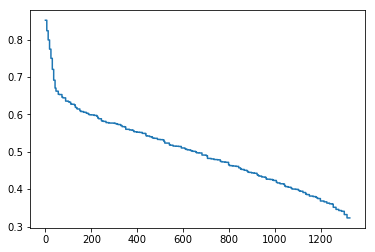

In [38]:
pfBoard = pe.string2card(["__","__","__","__","__"])
pfEArray = EquityArray(pfBoard)
ATC = Range(1.0)
plotEqDistn(ATC,ATC,pfBoard)
#ATC.getHandsSortedAndEquities(ATC,pfBoard)

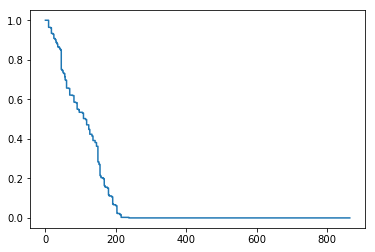

In [39]:
board = pe.string2card(["8d","6s","3h","Kd","Jd"])
ATC = Range(1.0)
r1 = Range(1.0)
r2 = Range(1.0)
r1.setToTop(0.2,board)
r2.setToTop(0.8,board)
plotEqDistn(r2,r1,board)

## The Shove Fold Game

In [40]:
def updateRange(r1, r2, n):
    
    

IndentationError: expected an indented block (<ipython-input-40-52f683374dda>, line 3)

In [41]:
def doShoveFoldGame():
    nIter = 50 #Iterations
    S = 10 # Stack size
    ea = EquityArray(pe.string2card(["__","__","__","__","__"]))
    ## Guess Inital Ranges
    sbJamRange = Range()
    sbJamRange.setAllFracs(0.5)
    bbCallRange = Range()
    bbCallRange.setAllFracs(0.5)
    
    for n in range(nIter):
        bestSBJameRange = Range()
        #Solve for sb max explt strat
        for i in range(numCards):
            for j in range(i + 1, numCards):
                hand = [i,j]
                bb_call_freq = bbCallRange.getNumHandsWithoutConflicts(hand) / numVillHands
                equity = getEquityVsRange(hand, bbCallRange, ea)
                evJam = (1 - bb_call_freq) * (S + 1) + (bb_call_freq) * equity *2*S
                evFold = S - 0.5
                if (evJam > evFold):
                    bestSBJamRange.setFrac(hand,1)
                    else:
                        bestSBJameRange.setFrac(hand, 0)
        
        #Solve for bb max expl strat
    display(sbJamRange)
    display(bbCallRange)

SyntaxError: invalid syntax (<ipython-input-41-0311fd54f056>, line 23)